In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Make `conceptlab` importable (in the future we will have this will not be necessary once we've cast this into a package)

In [37]:
import sys
SRC_DIR = '../'
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

Import

In [38]:
import conceptlab as clab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Initial Example

Generate an example dataset, we specify some arbitrary values for the different covariates

In [39]:
n_obs = 5000
n_vars = 1000

n_tissues = 3
n_celltypes = 10
n_batches = 2
n_concepts = 8

For the data generation we will use the `generate` function from our `DataGenerator` class, you have the function definition below

In [40]:
?clab.datagen.omics.OmicsDataGenerator.generate

Signature:
clab.datagen.omics.OmicsDataGenerator.generate(
    n_obs: typing.Annotated[int, 'x most be int and positive'],
    n_vars: typing.Annotated[int, 'x most be int and positive'] = 1000,
    n_batches: typing.Annotated[int, 'x most be int and positive'] = 3,
    n_tissues: typing.Annotated[int, 'x most be int and positive'] = 2,
    n_celltypes: typing.Annotated[int, 'x most be int and positive'] = 4,
    n_concepts: typing.Annotated[int, 'x most be int and positive'] = 8,
    baseline_lower: typing.Annotated[float, 'must be float and non-negative'] = 1,
    baseline_upper: typing.Annotated[float, 'must be float and non-negative'] = 5,
    std_batch: typing.Annotated[float, 'must be float and non-negative'] = 0.08,
    std_celltype: typing.Annotated[float, 'must be float and non-negative'] = 0.08,
    std_tissue: typing.Annotated[float, 'must be float and non-negative'] = 0.07,
    std_concept: typing.Annotated[float, 'must be float and non-negative'] = 0.05,
    std_libsize_lo

Run data generation

In [41]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = n_obs,
                                                         n_vars = n_vars,
                                                         n_tissues=n_tissues,
                                                         n_celltypes=n_celltypes,
                                                         n_batches = n_batches,
                                                         n_concepts = n_concepts,
                                                        )
                                                         

Inspect the generated data

In [42]:
dataset

<xarray.Dataset> Size: 82MB
Dimensions:                (obs: 5000, var: 1000, concept: 8, tissue: 3,
                            batch: 2, _concept: 8, celltype: 10, concepts: 8)
Coordinates:
    concepts               (obs, concept) float64 320kB 0.0 0.0 0.0 ... 0.0 1.0
  * obs                    (obs) <U8 160kB 'obs_0' 'obs_1' ... 'obs_4999'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * _concept               (_concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/18)
    data                   (obs, var) float64 40MB 5.0 1.0 1.0 ... 0.0 7.0 3.0
    concept_coef           (concept, var) float64 64kB -0.06582 0.0 ... -0.0 0.0
    tissues                (obs) <U8 160kB 'tissue_0' 'tissue_1' ... 'tissue_2'
    tissue_coef            (tissue, var) float64 24kB -0.05833 ... 2.393e-05
    batches                (obs) <U7 140kB 'batch_1' 'batch_0' ... 'batch_0'
    batch_coef             (batch, var) float64 16kB -0.07025 ... 0.03501
    ...                     ...
    p_tissue               (tissue) float64 24B 0.1954 0.4116 0.393
    p_celltype_in_tissue   (tissue, celltype) float64 240B 0.01103 ... 0.05357
    p_concept_in_celltype  (celltype, concept) float64 640B 0.01484 ... 6.826...
    baseline               (var) float64 8kB 1.333 0.6439 0.441 ... 1.367 0.5809
    exogenous_noise        (obs, var) float64 40MB 0.6365 0.4444 ... 0.7986
    bernoulli_prob         (obs, concepts) float64 320kB 0.0003354 ... 0.5769

### Accessing Information From the Dataset

This object holds the generated data as well as the parameters used to generate it. It's essentially like a multidimensional pandas data frame with named dimensions (see `xarray` website for more information: https://docs.xarray.dev/en/stable/). <br>
<br>
Below are a few examples of how you can access differente types of information

Gene expression data:

In [43]:
dataset.data.to_dataframe().unstack()

data                                                        ...  \
var      var_0 var_1 var_2 var_3 var_4 var_5 var_6 var_7 var_8 var_9  ...   
obs                                                                   ...   
obs_0      5.0   1.0   1.0   4.0   5.0   0.0   2.0   1.0   1.0   0.0  ...   
obs_1      5.0   3.0   2.0   2.0   4.0   2.0   2.0   2.0   0.0   4.0  ...   
obs_2      9.0   0.0   3.0   2.0   4.0   2.0   2.0   3.0   1.0   0.0  ...   
obs_3      4.0   0.0   4.0   1.0   4.0   1.0   3.0   1.0   1.0   1.0  ...   
obs_4      4.0   2.0   1.0   1.0   1.0   0.0   4.0   0.0   0.0   2.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
obs_4995   5.0   2.0   2.0   2.0   5.0   0.0   0.0   3.0   1.0   1.0  ...   
obs_4996   6.0   1.0   2.0   1.0   5.0   3.0   1.0   2.0   2.0   0.0  ...   
obs_4997   0.0   1.0   3.0   2.0   6.0   0.0   2.0   3.0   6.0   1.0  ...   
obs_4998   5.0   1.0   1.0   0.0   8.0   4.0   2.0   1.0   1.0   0.0  ...   
obs_4999   3.0   0.0   2.0   1.0   5.0   2.0   1.0   0.0   1.0   0.0  ...   

                                                                          \
var      var_990 var_991 var_992 var_993 var_994 var_995 var_996 var_997   
obs                                                                        
obs_0        0.0     2.0     2.0     2.0     6.0     0.0     7.0     1.0   
obs_1        2.0     3.0     1.0     2.0     1.0     0.0     5.0     0.0   
obs_2        1.0     6.0     1.0     2.0     4.0     3.0     4.0     2.0   
obs_3        0.0     8.0     0.0     2.0     4.0     2.0     3.0     0.0   
obs_4        1.0     3.0     2.0     1.0     1.0     3.0     5.0     1.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
obs_4995     0.0     3.0     1.0     0.0     7.0     0.0     6.0     0.0   
obs_4996     3.0     1.0     2.0     5.0     4.0     1.0     2.0     0.0   
obs_4997     0.0    10.0     2.0     1.0     5.0     0.0     5.0     2.0   
obs_4998     3.0     7.0     2.0     2.0     1.0     3.0     4.0     0.0   
obs_4999     0.0     1.0     1.0     1.0     2.0     2.0     6.0     0.0   

                          
var      var_998 var_999  
obs                       
obs_0        2.0     2.0  
obs_1        4.0     0.0  
obs_2        3.0     4.0  
obs_3        4.0     2.0  
obs_4        3.0     5.0  
...          ...     ...  
obs_4995     5.0     1.0  
obs_4996     3.0     4.0  
obs_4997     5.0     1.0  
obs_4998     4.0     0.0  
obs_4999     7.0     3.0  

[5000 rows x 1000 columns]

Concept indicators (whether a concept is present in a cell or not)

In [44]:
dataset.concepts.to_dataframe().unstack()

concepts                                                    \
concept  concept_0 concept_1 concept_2 concept_3 concept_4 concept_5   
obs                                                                    
obs_0          0.0       0.0       0.0       1.0       0.0       0.0   
obs_1          0.0       0.0       0.0       0.0       1.0       0.0   
obs_2          0.0       0.0       0.0       0.0       0.0       0.0   
obs_3          0.0       0.0       0.0       0.0       1.0       0.0   
obs_4          0.0       0.0       0.0       1.0       0.0       1.0   
...            ...       ...       ...       ...       ...       ...   
obs_4995       0.0       0.0       0.0       1.0       1.0       0.0   
obs_4996       0.0       0.0       0.0       0.0       0.0       0.0   
obs_4997       0.0       0.0       0.0       0.0       1.0       0.0   
obs_4998       0.0       1.0       0.0       0.0       0.0       1.0   
obs_4999       0.0       0.0       0.0       0.0       0.0       0.0   

                                                                      \
concept  concept_6 concept_7 concept_0 concept_1 concept_2 concept_3   
obs                                                                    
obs_0          0.0       0.0       0.0       0.0       0.0       1.0   
obs_1          0.0       0.0       0.0       0.0       0.0       0.0   
obs_2          0.0       0.0       0.0       0.0       0.0       0.0   
obs_3          1.0       0.0       0.0       0.0       0.0       0.0   
obs_4          0.0       0.0       0.0       0.0       0.0       1.0   
...            ...       ...       ...       ...       ...       ...   
obs_4995       0.0       0.0       0.0       0.0       0.0       1.0   
obs_4996       0.0       0.0       0.0       0.0       0.0       0.0   
obs_4997       0.0       0.0       0.0       0.0       0.0       0.0   
obs_4998       0.0       0.0       0.0       1.0       0.0       0.0   
obs_4999       0.0       1.0       0.0       0.0       0.0       0.0   

                                                  
concept  concept_4 concept_5 concept_6 concept_7  
obs                                               
obs_0          0.0       0.0       0.0       0.0  
obs_1          1.0       0.0       0.0       0.0  
obs_2          0.0       0.0       0.0       0.0  
obs_3          1.0       0.0       1.0       0.0  
obs_4          0.0       1.0       0.0       0.0  
...            ...       ...       ...       ...  
obs_4995       1.0       0.0       0.0       0.0  
obs_4996       0.0       0.0       0.0       0.0  
obs_4997       1.0       0.0       0.0       0.0  
obs_4998       0.0       1.0       0.0       0.0  
obs_4999       0.0       0.0       0.0       1.0  

[5000 rows x 16 columns]

Concept coefficients (impact of the concept on each gene)

In [45]:
dataset.concept_coef.to_dataframe().unstack()

concept_coef                                                    \
var              var_0     var_1     var_2     var_3     var_4     var_5   
concept                                                                    
concept_0    -0.065824  0.000000  0.000000 -0.000000 -0.031196 -0.001730   
concept_1     0.042463 -0.022176 -0.018811 -0.072655  0.081110 -0.026055   
concept_2     0.000000  0.000000 -0.000000 -0.000000 -0.000000  0.000000   
concept_3    -0.023991 -0.051538  0.000466  0.013508 -0.044291  0.000000   
concept_4     0.000000  0.000000 -0.000000 -0.000000 -0.000000  0.000000   
concept_5    -0.000000  0.000000 -0.000000  0.016411 -0.076765 -0.035983   
concept_6    -0.000000 -0.053268  0.000000  0.000000 -0.000000 -0.000000   
concept_7     0.015129  0.000000  0.060299 -0.000000 -0.090584  0.000000   

                                                   ...                      \
var           var_6     var_7     var_8     var_9  ...   var_990   var_991   
concept                                            ...                       
concept_0 -0.029096  0.121727 -0.012001 -0.018688  ... -0.028350  0.051041   
concept_1  0.078752 -0.021562 -0.046387  0.065976  ... -0.012599 -0.047922   
concept_2  0.000000 -0.000000 -0.000000  0.000000  ... -0.000000 -0.000000   
concept_3  0.013553  0.042595 -0.016407  0.012159  ...  0.003176 -0.075828   
concept_4  0.000000 -0.000000  0.002670 -0.000000  ...  0.000000  0.023642   
concept_5 -0.021680  0.060086 -0.000000 -0.053749  ...  0.000000  0.015823   
concept_6  0.029848 -0.000000  0.071323  0.088648  ...  0.000000  0.006478   
concept_7 -0.047176 -0.018974 -0.030605 -0.000000  ... -0.000000 -0.000000   

                                                                       \
var         var_992   var_993   var_994   var_995   var_996   var_997   
concept                                                                 
concept_0  0.000000  0.060902 -0.049282  0.064046 -0.000000  0.000000   
concept_1 -0.023790 -0.020412 -0.029662 -0.045917  0.020079  0.084832   
concept_2 -0.000000 -0.000000  0.000000 -0.000000 -0.000000 -0.000000   
concept_3  0.012726 -0.031850 -0.075780 -0.017606  0.064146  0.060403   
concept_4  0.000000  0.000000 -0.000000  0.000000  0.000000 -0.026209   
concept_5  0.000000  0.000000  0.002678 -0.017325  0.024319  0.030018   
concept_6  0.000000 -0.000000  0.000000  0.000000 -0.000000 -0.019130   
concept_7 -0.030796 -0.000000  0.000000  0.000000  0.031987  0.000000   

                               
var         var_998   var_999  
concept                        
concept_0  0.000165 -0.102374  
concept_1  0.046663 -0.016121  
concept_2  0.000000 -0.000000  
concept_3  0.047338  0.013462  
concept_4  0.000000 -0.000000  
concept_5  0.000000 -0.085620  
concept_6 -0.000000  0.000000  
concept_7 -0.000000  0.000000  

[8 rows x 1000 columns]

Tissue Indicator (which tissue type a cell belongs to)

In [46]:
dataset.tissues.to_dataframe().unstack()

         obs     
tissues  obs_0       tissue_0
         obs_1       tissue_1
         obs_2       tissue_2
         obs_3       tissue_1
         obs_4       tissue_1
                       ...   
         obs_4995    tissue_0
         obs_4996    tissue_1
         obs_4997    tissue_1
         obs_4998    tissue_1
         obs_4999    tissue_2
Length: 5000, dtype: object

Tissue coefficients (impact of tissue on base gene expression):

In [47]:
dataset.tissue_coef.to_dataframe().unstack()

tissue_coef                                                    \
var            var_0     var_1     var_2     var_3     var_4     var_5   
tissue                                                                   
tissue_0   -0.058328 -0.065282 -0.127810 -0.044045 -0.069255  0.008263   
tissue_1   -0.113744 -0.059912  0.048894 -0.031782  0.060255  0.014498   
tissue_2   -0.016864 -0.012900  0.012736 -0.075735 -0.094780  0.036381   

                                                  ...                      \
var          var_6     var_7     var_8     var_9  ...   var_990   var_991   
tissue                                            ...                       
tissue_0 -0.055137 -0.033571 -0.031654 -0.003372  ...  0.041137 -0.067289   
tissue_1  0.110544  0.072990  0.074271 -0.028831  ...  0.041593  0.034132   
tissue_2 -0.107377 -0.016286 -0.022825 -0.008630  ...  0.043851 -0.050718   

                                                                      \
var        var_992   var_993   var_994   var_995   var_996   var_997   
tissue                                                                 
tissue_0 -0.108391 -0.063635 -0.026938 -0.024185 -0.009023  0.072282   
tissue_1 -0.054516 -0.047440 -0.020202 -0.049466 -0.103117  0.047317   
tissue_2 -0.074033  0.095939 -0.114873  0.114642 -0.133748 -0.040918   

                              
var        var_998   var_999  
tissue                        
tissue_0  0.087448  0.140382  
tissue_1  0.024249 -0.093756  
tissue_2  0.068030  0.000024  

[3 rows x 1000 columns]

To see the different variables and dimensions simply do

In [48]:
dataset.var

<bound method DatasetAggregations.var of <xarray.Dataset> Size: 82MB
Dimensions:                (obs: 5000, var: 1000, concept: 8, tissue: 3,
                            batch: 2, _concept: 8, celltype: 10, concepts: 8)
Coordinates:
    concepts               (obs, concept) float64 320kB 0.0 0.0 0.0 ... 0.0 1.0
  * obs                    (obs) <U8 160kB 'obs_0' 'obs_1' ... 'obs_4999'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * _concept               (_concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/18)
    data                   (obs, var) float64 40MB 5.0 1.0 1.0 ... 0.0 7.0 3.0
    concept_coef           (concept, var) float64 64kB -0.06582 0.0 ...

### Generate more data

If you want to generate more data, with the same parameters as a given dataset, you can use the `generate_from_dataset` function, this reads the coefficient values from the provided data object and generates more data.

In [52]:
new_dataset = clab.datagen.omics.OmicsDataGenerator.generate_from_dataset(n_obs = 10, dataset = dataset)

dict_keys(['X_mat', 'U_mat', 'B_mat', 'C_mat', 'T_mat', 'L_mat', 'P_mat', 'exog_mat'])
dict_keys(['gamma', 'omega', 'tau', 'cs', 'ws', 'std_l', 'p_N', 'p_Q', 'p_T', 'p_C', 'cov'])


In [53]:
new_dataset

<xarray.Dataset> Size: 385kB
Dimensions:                (obs: 10, var: 1000, concept: 8, tissue: 3,
                            batch: 2, _concept: 8, celltype: 10, concepts: 8)
Coordinates:
    concepts               (obs, concept) float64 640B 0.0 0.0 0.0 ... 0.0 0.0
  * obs                    (obs) <U5 200B 'obs_0' 'obs_1' ... 'obs_8' 'obs_9'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * _concept               (_concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/18)
    data                   (obs, var) float64 80kB 7.0 2.0 2.0 ... 1.0 2.0 0.0
    concept_coef           (concept, var) float64 64kB -0.06582 0.0 ... -0.0 0.0
    tissues                (obs) <U8 320B 'tissue_0' 'tissue_0' ... 'tissue_2'
    tissue_coef            (tissue, var) float64 24kB -0.05833 ... 2.393e-05
    batches                (obs) <U7 280B 'batch_1' 'batch_0' ... 'batch_0'
    batch_coef             (batch, var) float64 16kB -0.07025 ... 0.03501
    ...                     ...
    p_tissue               (tissue) float64 24B 0.1954 0.4116 0.393
    p_celltype_in_tissue   (tissue, celltype) float64 240B 0.01103 ... 0.05357
    p_concept_in_celltype  (celltype, concept) float64 640B 0.01484 ... 6.826...
    baseline               (var) float64 8kB 1.333 0.6439 0.441 ... 1.367 0.5809
    exogenous_noise        (obs, var) float64 80kB 0.8276 0.6317 ... 0.04917
    bernoulli_prob         (obs, concepts) float64 640B 0.0003354 ... 0.0003354

In [54]:
del new_dataset,dataset

### Concept Inference

One question is whether we can actually evaluate the performance w.r.t. interventions etc. This is an example that shows that we can evaluate those interventions by looking at the estimated **concept coefficient** values. <br>
<br>
We will isolate or study to a single tissue, batch, celltype etc (equivalent to controlling for these variables) - just to illustrate the concept coefficient estimation

In [65]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = n_obs,
                                                         n_vars = n_vars,
                                                         n_tissues=1,
                                                         n_celltypes=1,
                                                         n_batches = 1,
                                                         n_concepts = 2,
                                                         zero_inflate = False,
                                                        )

In [66]:
dataset

<xarray.Dataset> Size: 81MB
Dimensions:                (obs: 5000, var: 1000, concept: 2, tissue: 1,
                            batch: 1, _concept: 2, celltype: 1, concepts: 2)
Coordinates:
    concepts               (obs, concept) float64 80kB 1.0 0.0 1.0 ... 1.0 0.0
  * obs                    (obs) <U8 160kB 'obs_0' 'obs_1' ... 'obs_4999'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 72B 'concept_0' 'concept_1'
  * _concept               (_concept) <U9 72B 'concept_0' 'concept_1'
  * tissue                 (tissue) <U8 32B 'tissue_0'
  * celltype               (celltype) <U10 40B 'celltype_0'
  * batch                  (batch) <U7 28B 'batch_0'
Data variables: (12/18)
    data                   (obs, var) float64 40MB 2.0 2.0 1.0 ... 4.0 3.0 5.0
    concept_coef           (concept, var) float64 16kB -0.02106 ... -0.06355
    tissues                (obs) <U8 160kB 'tissue_0' 'tissue_0' ... 'tissue_0'
    tissue_coef            (tissue, var) float64 8kB 0.04612 ... -0.02473
    batches                (obs) <U7 140kB 'batch_0' 'batch_0' ... 'batch_0'
    batch_coef             (batch, var) float64 8kB 0.005282 0.09018 ... 0.1154
    ...                     ...
    p_tissue               (tissue) float64 8B 1.0
    p_celltype_in_tissue   (tissue, celltype) float64 8B 1.0
    p_concept_in_celltype  (celltype, concept) float64 16B 0.9932 0.006784
    baseline               (var) float64 8kB 0.7689 1.407 0.8048 ... 1.032 1.167
    exogenous_noise        (obs, var) float64 40MB 0.445 0.1893 ... 0.631 0.6688
    bernoulli_prob         (obs, concepts) float64 80kB 0.9932 ... 0.006784

Get concept indicators and GEX

In [67]:
# concept indicators
C = dataset.concepts.to_dataframe().unstack()
# gene exprssion
X = dataset.data.to_dataframe().unstack()

In [68]:
C.head(10)

concepts                              
concept concept_0 concept_1 concept_0 concept_1
obs                                            
obs_0         1.0       0.0       1.0       0.0
obs_1         1.0       0.0       1.0       0.0
obs_2         1.0       0.0       1.0       0.0
obs_3         1.0       0.0       1.0       0.0
obs_4         1.0       0.0       1.0       0.0
obs_5         1.0       0.0       1.0       0.0
obs_6         1.0       0.0       1.0       0.0
obs_7         1.0       0.0       1.0       0.0
obs_8         1.0       0.0       1.0       0.0
obs_9         1.0       0.0       1.0       0.0

Calculate the ratio between the expected value the population of cells that have a concept activated vs. those where it's inactive

In [60]:
estim_coef = dict()
for i in range(C.shape[1]):
    concept = C.columns[i][1]
    cix = C.values[:,i].flatten().astype(bool)
    estim_coef[concept] = X.iloc[cix,:].mean(axis=0) / (X.iloc[~cix,:].mean(axis=0) + 1e-8)

C_pred = pd.DataFrame(estim_coef).T.data
C_pred.index = [f'{x}_pred' for x in C_pred.index]

Get true concept coefficients from the dataset

In [61]:
C_true = np.exp(dataset.concept_coef.to_dataframe().unstack().concept_coef)
C_true.index = [f'{x}_true' for x in C_true.index]

In [62]:
df = pd.concat((C_true,C_pred),axis =0) 

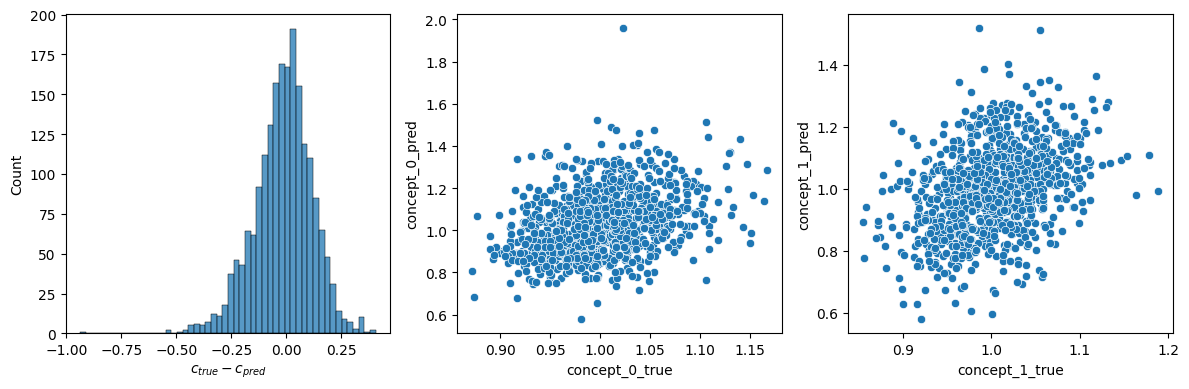

In [63]:
n_cols = 1 + len(C_true)
fig,ax = plt.subplots(1,n_cols, figsize = (4 * n_cols,4))
sns.histplot((C_true.values.flatten() - C_pred.values.flatten()), ax = ax[0])
ax[0].set_xlabel(r'$c_{true} - c_{pred}$')

for ii in range(C_true.shape[0]):
    sns.scatterplot(df.T,x = f'concept_{ii}_true',y= f'concept_{ii}_pred', ax = ax[ii+1],)

fig.tight_layout()

In other words, if you activte a concept $c_k$ in a population of cells, you should have, on average, an $\exp(c_{kj})$ fold change in expression in gene $j$ for those cells.

In [71]:
del dataset

### Modifying the concepts

Currently four types of modifications to the concepts are supported:
- Drop concepts
- Add concepts (that have no signal)
- Add noise to concepts (randomly flip a set number)
- Duplicate concepts

Here are examples of each one of them

In [72]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = 25,
                                                         n_vars = 50,
                                                         n_tissues=n_tissues,
                                                         n_celltypes=n_celltypes,
                                                         n_batches = n_batches,
                                                         n_concepts = n_concepts,
                                                        )
                                                         

In [73]:
dataset

<xarray.Dataset> Size: 40kB
Dimensions:                (obs: 25, var: 50, concept: 8, tissue: 3, batch: 2,
                            _concept: 8, celltype: 10, concepts: 8)
Coordinates:
    concepts               (obs, concept) float64 2kB 0.0 0.0 0.0 ... 0.0 1.0
  * obs                    (obs) <U6 600B 'obs_0' 'obs_1' ... 'obs_23' 'obs_24'
  * var                    (var) <U6 1kB 'var_0' 'var_1' ... 'var_48' 'var_49'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * _concept               (_concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/18)
    data                   (obs, var) float64 10kB 2.0 0.0 1.0 ... 2.0 6.0 2.0
    concept_coef           (concept, var) float64 3kB -0.0 0.0 0.0 ... -0.0 -0.0
    tissues                (obs) <U8 800B 'tissue_2' 'tissue_2' ... 'tissue_2'
    tissue_coef            (tissue, var) float64 1kB -0.02234 0.01521 ... 0.157
    batches                (obs) <U7 700B 'batch_0' 'batch_1' ... 'batch_1'
    batch_coef             (batch, var) float64 800B -0.07025 -0.02673 ... 0.104
    ...                     ...
    p_tissue               (tissue) float64 24B 0.1954 0.4116 0.393
    p_celltype_in_tissue   (tissue, celltype) float64 240B 0.01103 ... 0.05357
    p_concept_in_celltype  (celltype, concept) float64 640B 0.01484 ... 6.826...
    baseline               (var) float64 400B 0.9133 0.6393 ... 1.469 0.8646
    exogenous_noise        (obs, var) float64 10kB 0.554 0.02116 ... 0.2567
    bernoulli_prob         (obs, concepts) float64 2kB 0.0003354 ... 0.5769

Drop concept

In [74]:
new_concepts,indicator = clab.datagen.modify.drop_concepts(dataset,n_drop = 3)

The first return object is the new concept indicator, the second object is an indicator telling you which concepts were dropped

In [75]:
indicator

concept_0    original
concept_1    original
concept_2    original
concept_4    original
concept_5    original
concept_6    original
concept_7    original
dtype: object

Visualize the old and new concepts

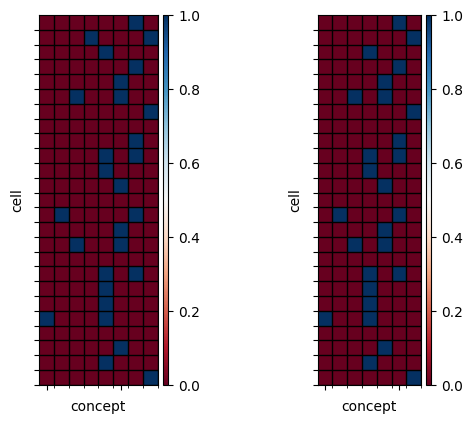

Concepts Dropped : 


In [76]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1])
string = ', '.join([str(k) for k,s in enumerate(indicator) if s == 'dropped'])
print('Concepts Dropped : {}'.format(string))

Add concepts:

In [77]:
new_concepts,indicator = clab.datagen.modify.add_concepts(dataset,n_add = 2, p_active = [0.9, 0.2])

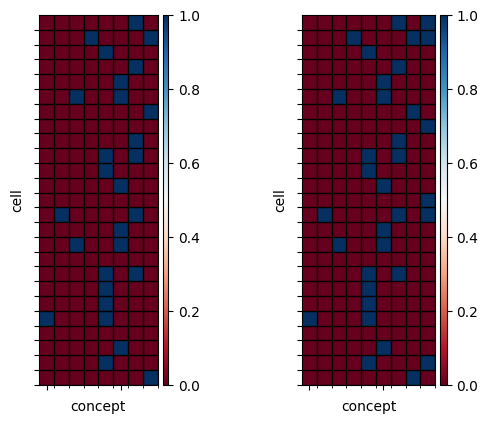

Concepts Added : 8


In [78]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1],)
string = ', '.join([str(k) for k,s in enumerate(indicator) if s == 'added'])
print('Concepts Added : {}'.format(string))

Add noise to concepts

In [83]:
new_concepts,indicator = clab.datagen.modify.add_noise(dataset,n_mod= 4, p_noise=0.2)

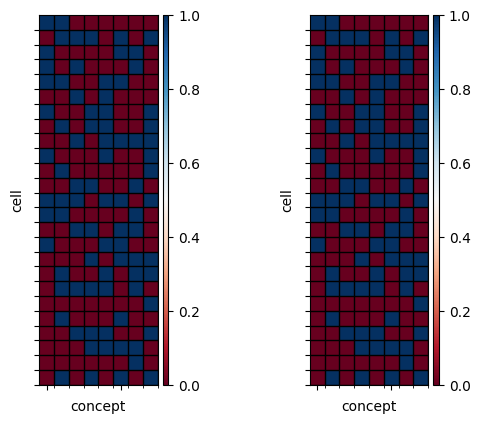

Concepts with noise : 0, 1, 4, 7


In [84]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1],)
string = ', '.join([str(k) for k,s in enumerate(indicator) if s == 'noisy'])
print('Concepts with noise : {}'.format(string))

Duplicate concepts

In [85]:
new_concepts,indicator = clab.datagen.modify.add_duplicate(dataset,n_duplicate= 2, n_replica=3)

The duplication indicator tells you which concepts are duplicates as well as well as which concepts that belong together

In [86]:
indicator

concept_0         original
concept_1         original
concept_2         original
concept_3         original
concept_4         original
concept_5      duplicate_5
concept_6         original
concept_7         original
duplicate_5    duplicate_5
duplicate_5    duplicate_5
duplicate_5    duplicate_5
dtype: object

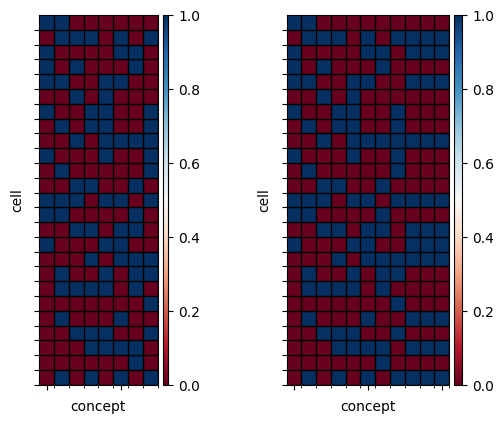

Concepts with redundancy : 5, 8, 9, 10


In [87]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1],)
string = ', '.join([str(k) for k,s in enumerate(indicator) if s.startswith('dup')])
print('Concepts with redundancy : {}'.format(string))

In [187]:
del dataset

### Counterfactual Generation

We can have a look at an example of counterfactual generation, used to evaluate observation-level (here: cell-level) interventions.
<hr>

For illustrative purposes, we set the cardinality of the categorical variables to 1 for all entries but the concepts. We also increase the standard variation for the concept values, this is to have slightly larger effect (easier to visualize).

In [406]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = 250,
                                                         n_vars = 50,
                                                         std_concept=1, # for larger effect
                                                         n_tissues=1, 
                                                         n_celltypes= 1,
                                                         n_batches = 1,
                                                         n_concepts = 5,
                                                        )
                                                         

Get a copy of the old data, to use in comparative analysis later on

In [407]:
old_data = dataset.data.to_dataframe()['data'].unstack().copy()

Get a modified version of the concepts values for the old data. Here we change the values from 0 to 1 for one of the concepts.

In [408]:
modify_concept = np.argmax(np.std(new_concepts, axis =0))
from_value = 0

print('Changing 0 values in concept_{} to 1'.format(modify_concept))

new_concepts = dataset.concepts.to_numpy().copy()
ixs = new_concepts[:, modify_concept] == from_value
new_concepts[:, modify_concept] = 1 - from_value

Changing 0 values in concept_0 to 1


Generate counterfactuals given the new concept configuration

In [409]:
new_data = clab.datagen.omics.OmicsDataGenerator.generate_intervention(dataset, new_concepts)

ValueError: operands could not be broadcast together with shapes (250,50) (12500,1) 

Get concept coefficients for the modified concept as well the data for the perturbed cells pre and post perturbation.

In [263]:
# concept coefficients
concept_coef = dataset.concept_coef.to_dataframe().unstack()['concept_coef'].iloc[modify_concept]

# data (expression) pre/post perturbation
post_pert_cells = new_data.iloc[ixs]
pre_pert_cells = old_data.iloc[ixs]

Visualize how the gene expression has changed on a cell-level.

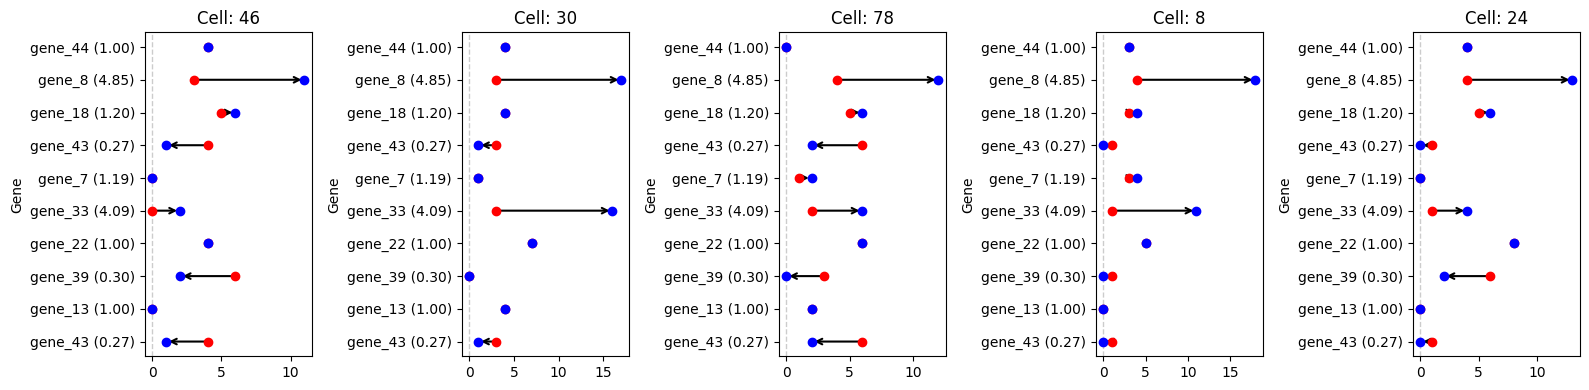

In [368]:
fig ,ax = plt.subplots(1, 5, figsize = (16, 4))
ax = ax.flatten()

var_idxs = np.random.choice(pre_pert_cells.shape[1], size = 10)
obs_idxs = np.random.choice(pre_pert_cells.shape[0], size = len(ax))

for obs_idx,axx in zip(obs_idxs, ax):
    plot_pert_per_cell(pre_pert_cells, post_pert_cells, np.exp(concept_coef),obs_idx, axx,  eps = 0.05, var_idxs = var_idxs)

fig.tight_layout()

We can also look at the _average_ change in the pre vs. post case, this should correspond to the concept coefficients (green dotted).

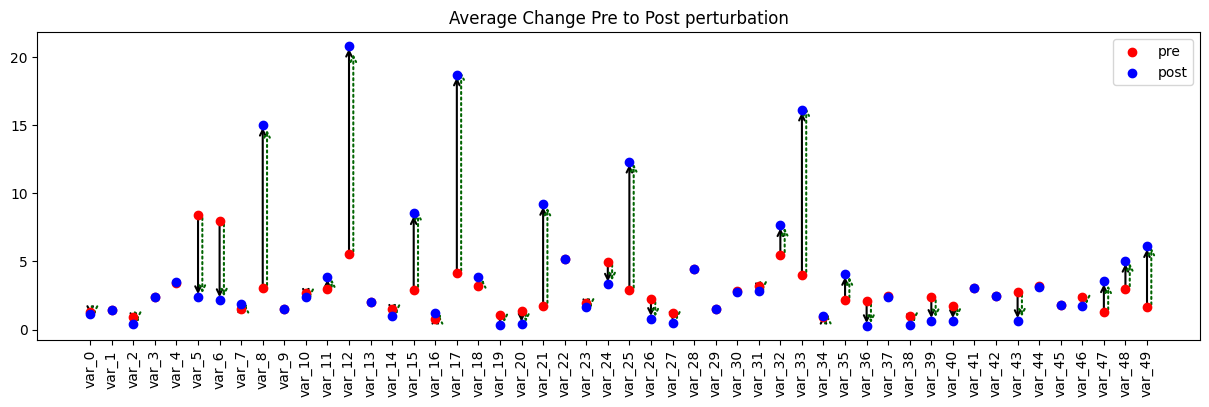

In [399]:
eps = 0.05

mean_pre = pre_pert_cells.mean(axis=0)
mean_post = post_pert_cells.mean(axis=0)

x, y1, y2 = np.arange(len(mean_pre)), mean_pre.values, mean_post.values
c  = np.exp(true_concept_coef).values
t2 = y1 * c

fig, ax = plt.subplots(1, 1, figsize=(15, 4))

for i in range(len(x)):
    # Arrow from pre → post

    if np.abs(c[i] - 1) > eps: 
    
        ax.annotate(
            "",
            xy=(x[i], y2[i]),        # arrow head (post)
            xytext=(x[i], y1[i]),    # arrow tail (pre)
            arrowprops=dict(arrowstyle="->", color="black", lw=1.5,)
        )
        
        ax.annotate(
            "",
            xy=(x[i] + 0.2, t2[i]),     # arrow head (predicted)
            xytext=(x[i] + 0.2, y1[i]), # arrow tail (pre)
            arrowprops=dict(arrowstyle="->", color="darkgreen", lw=1.5, linestyle="dotted")
        )

    # Scatter points
    ax.scatter([x[i]], [y1[i]], color="red", zorder=3, label="pre" if i == 0 else "")
    ax.scatter([x[i]], [y2[i]], color="blue", zorder=3, label="post" if i == 0 else "")
    
ax.legend()
ax.set_title("Average Change Pre to Post perturbation")
ax.set_xticks(x)
ax.set_xticklabels(mean_pre.index, rotation = 90)
plt.show()